## Insights

Import required modules

In [9]:
from collections import Counter
import nltk
import os
import sys
import json
from wordcloud import WordCloud
import datetime
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob as bl

Top locations in the tweets

In [10]:
def extract_locations(tweets, keyword):
    location_stopwords = ['Earth', 'Blockchain', 'Assist', 'assist', 'blockchain', 'Worldwide', 'City', 'city']
    locationset = ''
    for tweet in tweets:
        location = tweet['user']['location']
        if location is not None and location not in location_stopwords:
            locationset += ' {}'.format(location)
    wordcloud = WordCloud(max_font_size=40).generate(locationset)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(os.path.join('insights/{}_location.pdf'.format(keyword)))
    plt.show()

Finding number of people recommending buying/selling ethereum/bitcoin

In [11]:
def selling_buying_recommendations(tweets, keyword):
    recommendation = {'selling' : 0, 'buying' : 0}
    for tweet in tweets:
        text = tweet['text']
        if 'sell' in text or 'selling' in text:
            recommendation['selling'] += 1
        elif 'buy' in text or 'buying' in text:
            recommendation['buying'] += 1
    #recommendation['selling'] = (recommendation['selling']/100000 * 100)
    #recommendation['buying'] = (recommendation['buying']/100000 * 100)
    plt.bar(range(len(recommendation)), recommendation.values(), align='center')
    plt.xticks(range(len(recommendation)), recommendation.keys(), rotation=25)
    plt.savefig('{} buying selling.pdf'.format(keyword))
    plt.show()

Trying to analyze genuine traders and scammers in the tweets

In [12]:
def traders_scammers(tweets, keyword):
    traders = ['buy', 'sell', 'trade', 'finance', 'bull', 'bear', 'ledger', 'chart', 'cryptotrading', 'cryptotrader', 'daytrading']
    scammers = ['giveaway', 'airdrop', 'free', 'quick', 'earn', 'fast', 'limited', 'payment', 'opportunity']
    traders_tweets = []
    scammers_tweets = []
    for tweet in tweets:
        text = tweet['text']
        if any(x in text for x in traders):
            traders_tweets.append(tweet)
        if any(x in text for x in scammers):
            scammers_tweets.append(tweet) 
    traders_subj = []
    traders_pol = []
    scammers_subj = []
    scammers_pol = []
    for s in traders_tweets: 
        ss = bl(s['text'])
        traders_subj.append(ss.sentiment.subjectivity) 
        traders_pol.append(ss.sentiment.polarity) 
    for s in scammers_tweets: 
        ss = bl(s['text'])
        scammers_subj.append(ss.sentiment.subjectivity) 
        scammers_pol.append(ss.sentiment.polarity)
    plt.hist(traders_pol, bins=10) 
    plt.xlabel('traders_polarity score')
    plt.ylabel('tweet count')
    plt.grid(True)
    plt.savefig('{} traders polarity.pdf'.format(keyword))
    plt.show()
    plt.hist(traders_subj, bins=10) 
    plt.xlabel('traders_subjectivity score')
    plt.ylabel('tweet count')
    plt.grid(True)
    plt.savefig('{} traders subjectivity.pdf'.format(keyword))
    plt.show()
    plt.hist(scammers_pol, bins=10) 
    plt.xlabel('scammers_polarity score')
    plt.ylabel('tweet count')
    plt.grid(True)
    plt.savefig('{} scammers polarity.pdf'.format(keyword))
    plt.show()
    plt.hist(scammers_subj, bins=10) 
    plt.xlabel('scammers_subjectivity score')
    plt.ylabel('tweet count')
    plt.grid(True)
    plt.savefig('{} scammers subjectivity.pdf'.format(keyword))
    plt.show()     

In [15]:
currency = input('Enter currency (bitcoin/ethereum)')

Enter currencyethereum


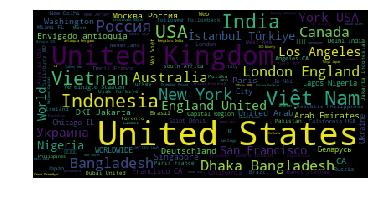

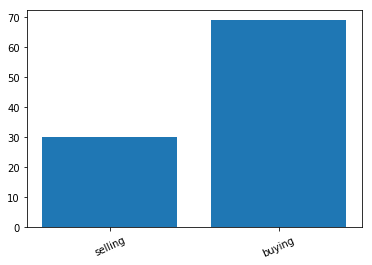

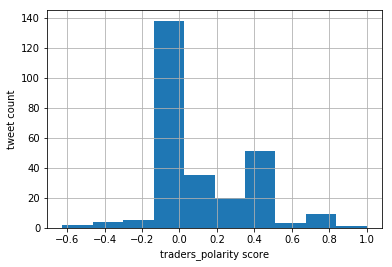

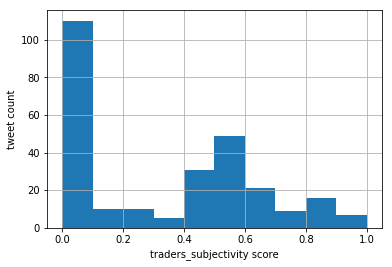

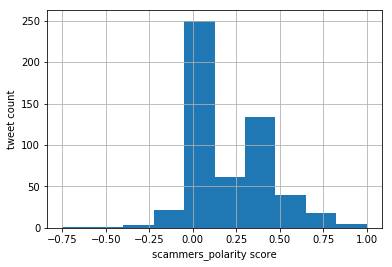

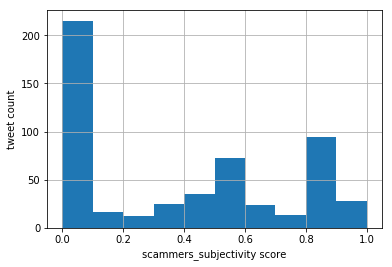

In [16]:
with open(os.path.join('downloaded_tweets/tweet_stream_{}_10000.json'.format(currency)), 'r') as file:
    tweets = json.load(file)
    extract_locations(tweets, currency)  
    
with open(os.path.join('downloaded_tweets/tweet_stream_{}_10000.json'.format(currency)), 'r') as file:
    tweets = json.load(file)
    selling_buying_recommendations(tweets, currency)
    
with open(os.path.join('downloaded_tweets/tweet_stream_{}_10000.json'.format(currency)), 'r') as file:
    tweets = json.load(file)
    traders_scammers(tweets, currency)